# Решающие деревья для задач классификации и регрессии
Группа: ИВТ-М20.<br/>
Студент: Архипов Дмитрий Алексеевич

In [1]:
import warnings
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import graphviz
from typing import Union, Any
from numpy import arange
from pandas import (
    DataFrame,
    read_csv
)
from sklearn.tree import export_graphviz
from sklearn.metrics import (
    accuracy_score,
    r2_score,
    mean_absolute_error
)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score
)
from sklearn.model_selection import GridSearchCV
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor
)
warnings.filterwarnings('ignore')


In [4]:
from google.colab import files
uploaded = files.upload()

Saving transformators.csv to transformators.csv
Saving transformators_regression.csv to transformators_regression.csv


## 1. Прочтите данные из файлов

In [6]:
transformators: DataFrame = DataFrame(
    read_csv(
        'transformators.csv',
        sep=',',
        header=0
    )
)
regression: DataFrame = DataFrame(
    read_csv(
        'transformators_regression.csv',
        sep=',',
        header=0
    )
)

## 2. Отобразите несколько первых и несколько последних записей.

In [7]:
print(transformators.head())
print(transformators.tail())
print(regression.head())
print(regression.tail())

         H2        CO      C2H4      C2H2  label
0  0.002590  0.016491  0.002876  0.000336      1
1  0.002825  0.014728  0.001992  0.000339      1
2  0.002764  0.017030  0.003394  0.000195      1
3  0.000508  0.016334  0.004104  0.000380      1
4  0.002654  0.021278  0.004068  0.000124      1
            H2        CO      C2H4      C2H2  label
2095  0.002549  0.009460  0.007465  0.000242      1
2096  0.000915  0.005770  0.007230  0.000081      3
2097  0.001565  0.002492  0.008529  0.000176      3
2098  0.001688  0.020291  0.007305  0.000252      1
2099  0.002935  0.028001  0.008048  0.000219      1
         H2        CO      C2H4      C2H2  label
0  0.002590  0.016491  0.002876  0.000336    541
1  0.002825  0.014728  0.001992  0.000339    520
2  0.002764  0.017030  0.003394  0.000195    583
3  0.000508  0.016334  0.004104  0.000380    487
4  0.002654  0.021278  0.004068  0.000124   1093
            H2        CO      C2H4      C2H2  label
2095  0.002549  0.009460  0.007465  0.000242   1

In [13]:
x = transformators.drop('label', axis=1)
y = transformators.label
x


,H2,CO,C2H4,C2H2
0,0.002590,0.016491,0.002876,0.000336
1,0.002825,0.014728,0.001992,0.000339
2,0.002764,0.017030,0.003394,0.000195
3,0.000508,0.016334,0.004104,0.000380
4,0.002654,0.021278,0.004068,0.000124
...,...,...,...,...
2095,0.002549,0.009460,0.007465,0.000242
2096,0.000915,0.005770,0.007230,0.000081
2097,0.001565,0.002492,0.008529,0.000176
2098,0.001688,0.020291,0.007305,0.000252


## 3. Разбейте данные для классификации

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)

In [17]:
x_train

,H2,CO,C2H4,C2H2
1203,0.003007,0.013886,0.004595,0.000349
831,0.001569,0.002769,0.005226,0.000226
603,0.002538,0.005191,0.007948,0.000137
52,0.002824,0.015692,0.006979,0.000275
1073,0.001864,0.010867,0.000602,0.000133
...,...,...,...,...
2043,0.001235,0.012664,0.006856,0.000316
954,0.001324,0.009373,0.005846,0.000246
1120,0.002185,0.023973,0.004253,0.000245
1088,0.001069,0.020990,0.008653,0.000109


## 4. Примените алгоритм дерева решений

In [18]:
clf: DecisionTreeClassifier = DecisionTreeClassifier()
clf.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 5. Сделайте предсказание на тестовой выборке.

In [20]:
test: object = y_test
pred: object = clf.predict(x_test)
print(f"Prediction: {pred}")

Prediction: [1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 4 3 1 1 1 1 1 1 1 1 1 1 4 1 2 1 1 1
 4 3 1 1 1 4 1 1 4 1 1 1 3 4 4 1 1 1 1 1 1 3 1 1 1 1 4 3 1 1 1 1 1 1 1 3 1
 1 1 1 1 3 3 4 2 4 1 1 1 1 4 1 1 1 2 4 1 1 1 1 1 4 1 1 1 1 2 1 4 1 1 4 1 1
 1 1 1 4 1 1 1 4 1 1 1 1 1 2 1 3 1 1 1 1 1 4 1 3 1 1 1 2 1 2 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 1 4 1 1 1 1 4 3 1 1 2 1 1 1 1 4 3 1 3
 1 1 1 1 1 1 4 1 4 1 1 1 1 1 1 3 1 1 4 1 1 1 4 4 3 1 1 1 3 1 1 1 1 4 1 1 1
 1 1 2 1 1 4 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 3 1 1 1 1 1 1
 1 1 3 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 1 1 4 1 4 1 1 2 1 4 1 1 1
 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 4 1 4 1 1 1 1 1 3 4
 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 3 1 1 1 1 1 1 1 4 1
 1 1 1 1 1 3 4 3 1 1 1 1 1 4 1 1 1 1 1 1 3 1 2 1 1 1 1 1 1 1 1 4 1 1 1 3 4
 1 1 1 1 1 1 1 4 1 1 1 1 2 4 1 3 1 1 4 1 1 1 1 1 2 4 1 1 3 3 1 1 3 4 1 1 1
 3 2 1 2 1 1 3 4 1 1 1 1 1 3 3 1 4 2 1 1 1 2 1 3 1 1 4 1 1 1 1 1 1 1 1 1 1
 1 1 4 2 1 1 

In [21]:
y_true = y_test
y_pred = clf.predict(x_test)

print(accuracy_score(y_true, y_pred, normalize=True))
print(classification_report(y_true, y_pred))

0.8968253968253969
              precision    recall  f1-score   support

           1       0.98      0.93      0.96       511
           2       0.81      0.78      0.79        32
           3       0.47      0.70      0.56        33
           4       0.63      0.74      0.68        54

    accuracy                           0.90       630
   macro avg       0.72      0.79      0.75       630
weighted avg       0.91      0.90      0.90       630



## 6. Выполните подбор гиперпараметров модели

In [23]:
parameters = {
    'criterion':['gini','entropy'],
    'max_depth':[x for x in range(0,150,10)],
    'min_samples_split': [x for x in range(0,10,2)],
    'min_samples_leaf': [x for x in range(0,15,3)]
}
grid: GridSearchCV = GridSearchCV(
    DecisionTreeClassifier(),
    parameters,
    cv=5
)
gs_result: Union[GridSearchCV, Any] = grid.fit(x_train, y_train)
print(gs_result)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

## 7. Заново обучите модель с подобранными гиперпараметрами

In [24]:
print(gs_result.best_params_)
print(gs_result.best_score_)
print(gs_result.predict(x_test))

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.9115646258503401
[1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 4 3 1 1 1 1 1 1 1 1 1 1 4 1 4 1 1 1
 4 3 3 1 1 4 1 1 1 1 1 1 3 4 4 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1
 1 1 1 3 1 3 4 2 1 1 1 1 1 4 1 3 1 2 4 1 1 1 1 1 4 1 1 1 1 2 1 1 1 1 4 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 3 1 1 1 1 1 4 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 3 1 3 1 1 2 1 1 1 1 4 1 1 3
 1 1 1 1 1 1 4 1 4 1 1 1 1 1 1 3 1 1 1 1 1 1 4 4 1 1 1 1 1 1 1 1 1 4 1 1 1
 1 1 2 1 1 4 1 1 1 1 1 1 4 1 1 1 1 1 1 3 1 1 1 1 1 2 1 1 1 1 4 1 1 1 1 1 1
 1 1 3 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 4 1 4 1 1 2 1 4 1 1 1
 1 1 1 1 2 2 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 4 1 1 1 1 1 3 2
 1 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 3 3 1 1 1 1 1 4 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 4 1 1 1 1 1
 1 1 1 1 1 1 1 4 1 1 1 1 2 2 1 3 1 1 1 1 1 1 1 1 4 1 1 1 3 3 1 1 1 4 1

In [25]:
y_true = y_test
y_pred = gs_result.predict(x_test)

print(accuracy_score(y_true, y_pred, normalize=True))
print(classification_report(y_true, y_pred))

0.9063492063492063
              precision    recall  f1-score   support

           1       0.96      0.96      0.96       511
           2       0.82      0.84      0.83        32
           3       0.56      0.67      0.61        33
           4       0.70      0.59      0.64        54

    accuracy                           0.91       630
   macro avg       0.76      0.77      0.76       630
weighted avg       0.91      0.91      0.91       630



## 8. Постройте итоговое дерево классификации

[Text(182.5408536585366, 209.07692307692307, 'X[1] <= 0.007\ngini = 0.327\nsamples = 1470\nvalue = [1194, 57, 80, 139]'),
 Text(97.13963414634146, 192.35076923076923, 'X[2] <= 0.004\ngini = 0.732\nsamples = 279\nvalue = [59, 57, 61, 102]'),
 Text(45.59268292682927, 175.62461538461537, 'X[1] <= 0.002\ngini = 0.63\nsamples = 190\nvalue = [29, 57, 8, 96]'),
 Text(17.69268292682927, 158.89846153846153, 'X[3] <= 0.0\ngini = 0.271\nsamples = 52\nvalue = [0, 44, 3, 5]'),
 Text(10.887804878048781, 142.1723076923077, 'X[0] <= 0.001\ngini = 0.153\nsamples = 48\nvalue = [0, 44, 0, 4]'),
 Text(5.443902439024391, 125.44615384615385, 'X[3] <= 0.0\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 0, 3]'),
 Text(2.7219512195121953, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]'),
 Text(8.165853658536586, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3]'),
 Text(16.33170731707317, 125.44615384615385, 'X[0] <= 0.001\ngini = 0.045\nsamples = 43\nvalue = [0, 42, 0, 1]'),
 Text(13.609756097560977, 1

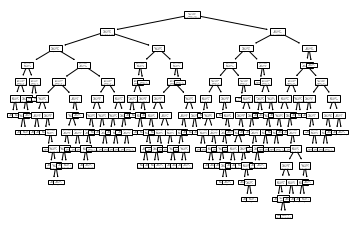

In [26]:
tree.plot_tree(clf);

## 9. Разбейте данные для регрессии

In [29]:
regression


,H2,CO,C2H4,C2H2,label
0,0.002590,0.016491,0.002876,0.000336,541
1,0.002825,0.014728,0.001992,0.000339,520
2,0.002764,0.017030,0.003394,0.000195,583
3,0.000508,0.016334,0.004104,0.000380,487
4,0.002654,0.021278,0.004068,0.000124,1093
...,...,...,...,...,...
2095,0.002549,0.009460,0.007465,0.000242,1093
2096,0.000915,0.005770,0.007230,0.000081,1093
2097,0.001565,0.002492,0.008529,0.000176,719
2098,0.001688,0.020291,0.007305,0.000252,698


In [34]:
r = regression.drop('label', axis=1)
ry = regression.label

In [35]:
r

,H2,CO,C2H4,C2H2
0,0.002590,0.016491,0.002876,0.000336
1,0.002825,0.014728,0.001992,0.000339
2,0.002764,0.017030,0.003394,0.000195
3,0.000508,0.016334,0.004104,0.000380
4,0.002654,0.021278,0.004068,0.000124
...,...,...,...,...
2095,0.002549,0.009460,0.007465,0.000242
2096,0.000915,0.005770,0.007230,0.000081
2097,0.001565,0.002492,0.008529,0.000176
2098,0.001688,0.020291,0.007305,0.000252


In [31]:
r_train, r_test, ry_train, ry_test = train_test_split(r, ry, test_size=0.3, train_size=0.7)

## 10. Примените алгоритм дерева регрессии


In [32]:
clf: DecisionTreeRegressor = DecisionTreeRegressor()
clf.fit(r_train, ry_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

## 11. Сделайте предсказание на тестовой выборке

In [33]:
test: object = ry_test
pred: object = clf.predict(r_test)
print(f"Prediction: {pred}")

print(f"r2_score: {round(r2_score(test, pred), 3)}")
print(f"mean_absolute_error: {round(mean_absolute_error(test, pred), 3)}")

Prediction: [1093. 1093. 1093.  833.  600.  528.  543.  920.  701. 1093.  810.  611.
  631. 1093. 1093.  910. 1093.  484.  633.  634.  714.  515.  528.  719.
  795.  537. 1093.  867.  584. 1093.  583. 1093.  652.  635.  734.  489.
 1093.  705.  481. 1093.  529.  742.  635.  490. 1093. 1093.  516.  701.
  775. 1093.  537. 1093.  858.  646. 1093.  710.  425.  615.  700. 1093.
 1093.  658.  580. 1093. 1093.  791.  840.  635.  512.  520.  550.  647.
  540.  870.  854.  563.  727.  683.  430.  866.  538.  700.  762.  483.
 1093.  774. 1093.  544.  765. 1093.  543.  490. 1093.  624. 1093. 1093.
  506.  565.  494. 1093.  769.  725. 1093.  590.  854.  471. 1093.  617.
 1093.  489. 1093.  884.  545.  781. 1093.  832. 1093.  577. 1093.  548.
  556.  884. 1093. 1093.  668. 1093.  443.  494. 1093. 1093. 1093.  477.
  962.  714.  591.  463.  719.  598.  718.  502.  864. 1093. 1093. 1093.
 1093.  723.  594.  558. 1093. 1093.  514.  597.  560. 1093.  729. 1093.
 1093. 1093.  502. 1093.  559.  658. 10

## 12. Выполните подбор гиперпараметров модели

In [36]:
parameters = {
    'splitter':('best','random'),
    'max_depth': arange(1,10),
    'min_samples_split': arange(2,10),
    'min_samples_leaf': arange(1,5)
}
grid: GridSearchCV = GridSearchCV(
    DecisionTreeRegressor(),
    parameters,
    cv=5
)
gs_result: Union[GridSearchCV, Any] = grid.fit(r_train, ry_train)
print(gs_result)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
               

## 13. Заново обучите модель с подобранными гиперпараметрам

In [37]:
print(gs_result.best_params_)
print(gs_result.best_score_)
print(gs_result.predict(r_test))
pred: object = gs_result.predict(r_test)

print(f"r2_score: {round(r2_score(test, pred), 3)}")
print(f"mean_absolute_error: {round(mean_absolute_error(test, pred), 3)}")

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
0.28008095673455224
[ 812.06818182 1070.16666667 1013.20454545  831.13333333  749.07103825
  723.125       538.875       919.89230769  831.13333333  831.13333333
  699.65656566  855.55813953  662.2         827.94117647  927.82926829
  927.82926829  585.83333333  450.4         567.25        585.83333333
  749.07103825  607.          815.5625      934.52941176  831.13333333
  753.57142857  910.17391304  865.          721.77272727  815.5625
  436.          749.07103825  749.07103825  832.77631579  910.17391304
  480.          855.55813953  910.17391304  533.          919.89230769
  749.07103825  699.65656566  749.07103825  749.07103825 1013.20454545
 1013.20454545  567.5         831.13333333  910.17391304  598.
  721.77272727 1027.109375   1013.20454545  598.         1027.109375
  753.57142857  425.          721.77272727  651.92307692  605.
  749.07103825  585.61538462  831.13333333  832.77631579  749.07

## 14. Постройте итоговое дерево регрессии

[Text(182.8760760116732, 213.0912, 'X[1] <= 0.014\nmse = 58824.413\nsamples = 1470\nvalue = 795.514'),
 Text(86.50865991538082, 204.3936, 'X[0] <= 0.003\nmse = 56121.928\nsamples = 623\nvalue = 875.302'),
 Text(64.81034436814781, 195.696, 'X[3] <= 0.0\nmse = 49765.745\nsamples = 561\nvalue = 903.062'),
 Text(39.27306543302976, 186.9984, 'X[2] <= 0.006\nmse = 38222.064\nsamples = 395\nvalue = 952.408'),
 Text(20.513515865189397, 178.3008, 'X[0] <= 0.002\nmse = 28062.067\nsamples = 298\nvalue = 992.591'),
 Text(11.040884041997796, 169.60320000000002, 'X[3] <= 0.0\nmse = 16976.692\nsamples = 211\nvalue = 1025.0'),
 Text(4.11726898311967, 160.9056, 'X[2] <= 0.001\nmse = 11665.349\nsamples = 171\nvalue = 1049.193'),
 Text(1.553686408724404, 152.208, 'X[3] <= 0.0\nmse = 2171.316\nsamples = 56\nvalue = 1084.071'),
 Text(1.2429491269795232, 143.5104, 'X[1] <= 0.002\nmse = 5008.193\nsamples = 23\nvalue = 1071.261'),
 Text(0.9322118452346424, 134.81279999999998, 'X[1] <= 0.002\nmse = 10920.025\n

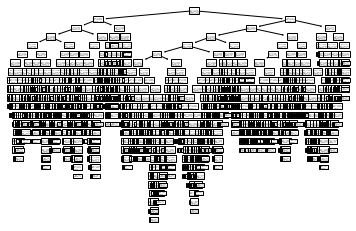

In [38]:
tree.plot_tree(clf)

# Ответы на контрольные вопросы

## 1. Опишите этапы построения алгоритма дерева решений для задачи классификации и регрессии. Чем они отличаются и чем схожи?

Деревья решений как аналитические модели более вербализуемы и интерпретируемы, чем, скажем, нейронные сети. В обучающем множестве для примеров должно быть задано целевое значение, т.к. деревья решений являются моделями, строящимися на основе обучения с учителем. При этом, если целевая переменная дискретная (метка класса), то модель называют деревом классификации, а если непрерывная, то деревом регрессии.

Собственно, само дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия примеров этому правилу по какому-либо атрибуту обучающего множества.

В простейшем случае, в результате проверки, множество примеров, попавших в узел, разбивается на два подмножества, в одно из которых попадают примеры, удовлетворяющие правилу, а в другое — не удовлетворяющие.

Затем к каждому подмножеству вновь применяется правило и процедура рекурсивно повторяется пока не будет достигнуто некоторое условие остановки алгоритма. В результате в последнем узле проверка и разбиение не производится и он объявляется листом. Лист определяет решение для каждого попавшего в него примера. Для дерева классификации — это класс, ассоциируемый с узлом, а для дерева регрессии — соответствующий листу модальный интервал целевой переменной.

Таким образом, в отличие от узла, в листе содержится не правило, а подмножество объектов, удовлетворяющих всем правилам ветви, которая заканчивается данным листом.

Очевидно, чтобы попасть в лист, пример должен удовлетворять всем правилам, лежащим на пути к этому листу. Поскольку путь в дереве к каждому листу единственный, то и каждый пример может попасть только в один лист, что обеспечивает единственность решения.

В ходе построения дерева решений нужно решить несколько основных проблем, с каждой из которых связан соответствующий шаг процесса обучения:

Выбор атрибута, по которому будет производиться разбиение в данном узле (атрибута разбиения).
Выбор критерия остановки обучения.
Выбор метода отсечения ветвей (упрощения).
Оценка точности построенного дерева.


## 2. Какие метрики используются для оценки качества работы алгоритмов при решении задачи регрессии? Опишите данные метрики с математической точки зрения и скажите, чем они отличаются друг от друга.

1.	Cредняя абсолютная ошибка (англ. Mean Absolute Error, MAE)
Среднеквадратичный функционал сильнее штрафует за большие отклонения по сравнению со среднеабсолютным, и поэтому более чувствителен к выбросам. При использовании любого из этих двух функционалов может быть полезно проанализировать, какие объекты вносят наибольший вклад в общую ошибку — не исключено, что на этих объектах была допущена ошибка при вычислении признаков или целевой величины.
Среднеквадратичная ошибка подходит для сравнения двух моделей или для контроля качества во время обучения, но не позволяет сделать выводов о том, на сколько хорошо данная модель решает задачу. Например, MSE = 10 является очень плохим показателем, если целевая переменная принимает значения от 0 до 1, и очень хорошим, если целевая переменная лежит в интервале (10000, 100000). В таких ситуациях вместо среднеквадратичной ошибки полезно использовать коэффициент детерминации — R^2

2.	Средняя квадратичная ошибка (англ. Mean Squared Error, MSE)
MSE применяется в ситуациях, когда нам надо подчеркнуть большие ошибки и выбрать модель, которая дает меньше больших ошибок прогноза. Грубые ошибки становятся заметнее за счет того, что ошибку прогноза мы возводим в квадрат. И модель, которая дает нам меньшее значение среднеквадратической ошибки, можно сказать, что что у этой модели меньше грубых ошибок.

3.	Корень из средней квадратичной ошибки (англ. Root Mean Squared Error, RMSE)
Примерно такая же проблема, как и в MAPE: так как каждое отклонение возводится в квадрат, любое небольшое отклонение может значительно повлиять на показатель ошибки. Стоит отметить, что существует также ошибка MSE, из которой RMSE как раз и получается путем извлечения корня.

4.	Средняя абсолютная процентная ошибка (англ. Mean Absolute Percentage Error, MAPE)
Это коэффициент, не имеющий размерности, с очень простой интерпретацией. Его можно измерять в долях или процентах. Если у вас получилось, например, что MAPE=11.4%, то это говорит о том, что ошибка составила 11,4% от фактических значений. Основная проблема данной ошибки — нестабильность.

5.	Коэффициент детерминации
Коэффициент детерминации измеряет долю дисперсии, объясненную моделью, в общей дисперсии целевой переменной. Фактически, данная мера качества — это нормированная среднеквадратичная ошибка. Если она близка к единице, то модель хорошо объясняет данные, если же она близка к нулю, то прогнозы сопоставимы по качеству с константным предсказанием.

## 3. Каким способом можно повысить качество работы алгоритмов регрессии?

Чтобы повысить качество кластеризации у нас есть два варианта. 1) Применить метрики, посмотреть результат и попробовать другой метод(алгоритм) кластеризации. 2) Применить метрики, посмотреть результат и изменить или добавить информативные признаки.(Это исходя из пункта 21 самой работы)

На повышение качества работы алгоритма оказывают влияние правильно подобранные гиперпараметры. Есть три подхода в оптимизации гиперпараметров: Байесовская оптимизация, поиск по решетке и случайный поиск. Как правило, самым эффективным подходом оказывается Байесовская оптимизация.
1) Байесовская оптимизация - значения гиперпараметров в текущей итерации выбираются с учётом результатов на предыдущем шаге. Основная идея алгоритма заключается в следующем – на каждой итерации подбора находится компромисс между исследованием регионов с самыми удачными из найденных комбинаций гиперпараметров и исследованием регионов с большой неопределённостью (где могут находиться ещё более удачные комбинации).
2) Поиск по решётке - в этом способе значения гиперпараметров задаются вручную, затем выполняется их полный перебор. Популярной реализацией этого метода является Grid Search из sklearn.